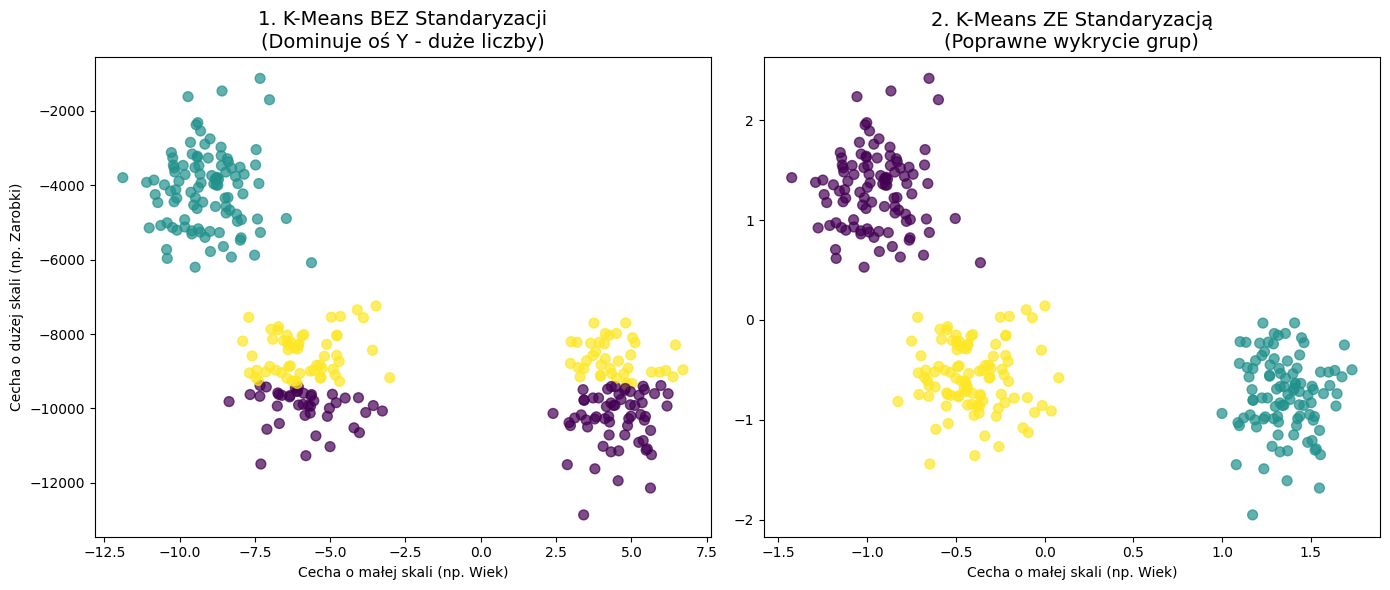

In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=21)

X_bad_scale = X.copy()
# scale the second feature to be much larger
X_bad_scale[:, 1] = X_bad_scale[:, 1] * 1000

# raw
kmeans_raw = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_raw = kmeans_raw.fit_predict(X_bad_scale)

# standardized
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_bad_scale)
kmeans_scaled = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_scaled = kmeans_scaled.fit_predict(X_scaled)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.scatter(X_bad_scale[:, 0], X_bad_scale[:, 1], c=labels_raw, cmap='viridis', s=50, alpha=0.7)
ax1.set_title("1. K-Means BEZ Standaryzacji\n(Dominuje oś Y - duże liczby)", fontsize=14)
ax1.set_xlabel("Cecha o małej skali (np. Wiek)")
ax1.set_ylabel("Cecha o dużej skali (np. Zarobki)")

ax2.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_scaled, cmap='viridis', s=50, alpha=0.7)
ax2.set_title("2. K-Means ZE Standaryzacją\n(Poprawne wykrycie grup)", fontsize=14)
ax2.set_xlabel("Cecha o małej skali (np. Wiek)")

plt.tight_layout()
plt.show()